## 模型训练  
模型 = 数据 + 算法，即通过输入数据求解优化问题，得到输入与输出之间的映射关系  
对于分类问题，模型得到结果一般是每个样本属于某个分类的概率预测  

### 数据集划分  
划分数据集的目的是模型评估和模型选择  
sklearn.model_selection.train_test_split  

#### 单次划分  

In [75]:
import pandas as pd 
import warnings 
warnings.filterwarnings('ignore')

train_lr = pd.read_csv('../data/lr_train.csv')
test_lr = pd.read_csv('../data/lr_test.csv')
y = pd.read_csv('../data/train_target.csv')

print('训练数据样本量 = ', len(train_lr))
print('测试数据样本量 = ', len(test_lr))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(train_lr, y, test_size = 0.2)

print('训练集样本量 = ', len(X_train))
print('验证集样本量 = ', len(X_valid))

训练集样本量 =  246005
验证集样本量 =  61502


#### 交叉验证  
进行多轮的单次划分，使训练数据中的所有样本都成为过验证集  
sklearn.model_selection.KFold

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits = 5)
for train_index, valid_index in kf.split(train_lr):
    print('训练集样本量 = ', len(train_index))
    print('训练集下标 = ', train_index)
    print('验证集样本量 = ', len(train_index))
    print('验证集下表 = ', valid_index)
    print()

训练集样本量 =  246005
训练集下标 =  [ 61502  61503  61504 ... 307504 307505 307506]
验证集样本量 =  246005
验证集下表 =  [    0     1     2 ... 61499 61500 61501]

训练集样本量 =  246005
训练集下标 =  [     0      1      2 ... 307504 307505 307506]
验证集样本量 =  246005
验证集下表 =  [ 61502  61503  61504 ... 123001 123002 123003]

训练集样本量 =  246006
训练集下标 =  [     0      1      2 ... 307504 307505 307506]
验证集样本量 =  246006
验证集下表 =  [123004 123005 123006 ... 184502 184503 184504]

训练集样本量 =  246006
训练集下标 =  [     0      1      2 ... 307504 307505 307506]
验证集样本量 =  246006
验证集下表 =  [184505 184506 184507 ... 246003 246004 246005]

训练集样本量 =  246006
训练集下标 =  [     0      1      2 ... 246003 246004 246005]
验证集样本量 =  246006
验证集下表 =  [246006 246007 246008 ... 307504 307505 307506]



### 参数求解  
通过优化算法得到优化问题中参数的解  
以二分类逻辑回归为例，模型需要求解的参数为n个参数w  
$  
ln\frac{y}{1-y}=w_1x_1+w_2x_2+...+w_nx_n+b
$  
其优化目标为最小化交叉熵损失函数   
$  
loss(w)=-yln\hat y-(1-y)ln(1-\hat y)
$  

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train['TARGET'])

for col, coef in zip(X_train.columns, lr.coef_[0]):
    print(col, coef)

AMT_ANNUITY_bin_0 -0.2610578473897781
AMT_ANNUITY_bin_1 -0.10990738186941332
AMT_ANNUITY_bin_2 -0.002461935195663043
AMT_ANNUITY_bin_3 0.15742867222588167
AMT_ANNUITY_bin_4 0.13836008527979482
AMT_ANNUITY_bin_5 -0.013329081821476072
YEARS_BUILD_AVG_bin_0 -0.04963433975917137
YEARS_BUILD_AVG_bin_1 -0.06008141603923413
YEARS_BUILD_AVG_bin_2 0.025226074853683268
YEARS_BUILD_AVG_bin_3 -0.05322795371258763
YEARS_BUILD_AVG_bin_4 0.04247981553636676
YEARS_BUILD_AVG_bin_5 0.004270330350303117
HOUR_APPR_PROCESS_START_bin_0 -0.02727574988348172
HOUR_APPR_PROCESS_START_bin_1 0.0028739098752451862
HOUR_APPR_PROCESS_START_bin_2 0.006134574078800182
HOUR_APPR_PROCESS_START_bin_3 -0.018395263342522745
HOUR_APPR_PROCESS_START_bin_4 -0.05430495949870204
LIVINGAPARTMENTS_AVG_bin_0 0.02107883327814946
LIVINGAPARTMENTS_AVG_bin_1 0.009909665368822181
LIVINGAPARTMENTS_AVG_bin_2 -0.16444190990051272
LIVINGAPARTMENTS_AVG_bin_3 -0.006710222910831095
LIVINGAPARTMENTS_AVG_bin_4 0.03233394121152586
LIVINGAPARTMEN

### 模型评估  
混淆矩阵是预测目标和模型预测结果交叉之后的二位矩阵  
Accuracy: 判断正确的结果占总观测值的比例  
Precision: 模型预测是1的所有结果中，模型预测对的比例  
Recall: 真实值是1的所有结果中，模型预测对的比例  
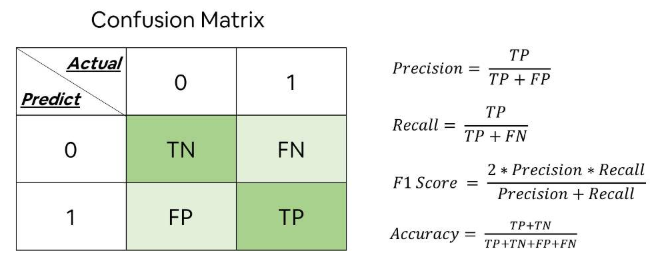  
ROC曲线是在不同阈值下，TPR与FPR之间的关系  
AUC是ROC曲线下的面积  
$  
TPR=\frac{TP}{TP+FN}, FPR=\frac{FP}{FP+TN}  
$  
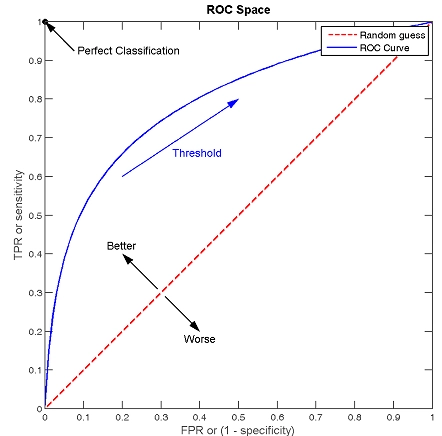  
sklearn.metrics

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

y_pred_train = lr.predict(X_train)
y_pred_valid = lr.predict(X_valid)
prob_train = lr.predict_proba(X_train)[:, 1]
prob_valid = lr.predict_proba(X_valid)[:, 1]

def evaluate(y_true, y_pred, prob):
    # 计算准确率
    acc = accuracy_score(y_true, y_pred)
    print('Accuracy = {:.4f}'.format(acc))

    # 计算精确率
    precision = precision_score(y_true, y_pred)
    print('Precision = {:.4f}'.format(precision))

    # 计算召回率
    recall = recall_score(y_true, y_pred)
    print('Recall = {:.4f}'.format(recall))

    # 计算F1分数
    f1 = f1_score(y_true, y_pred)
    print('F1-score = {:.4f}'.format(f1))

    # 计算ROC曲线和AUC
    auc = roc_auc_score(y_true, prob)
    print('auc = {:.4f}'.format(auc))

print('训练集模型评估')
evaluate(y_train['TARGET'], y_pred_train, prob_train)

print('验证集模型评估')
evaluate(y_valid['TARGET'], y_pred_valid, prob_valid)

训练集模型评估
Accuracy = 0.9191
Precision = 0.4372
Recall = 0.0054
F1-score = 0.0107
auc = 0.7483
验证集模型评估
Accuracy = 0.9193
Precision = 0.4576
Recall = 0.0054
F1-score = 0.0108
auc = 0.7424


### 模型调优-超参数调整

#### 网格搜索  
遍历所有可能的超参数组合，得到预测效果最好的一组超参数  
适用于组合种类较少的情况  
sklearn.model_selection import GridSearchCV

#### 随机搜索  
在所有超参数组合中随机选择组合  
适用于组合种类较多的情况  
sklearn.model_selection import RandomizedSearchCV

### 模型存储与预测  

In [ ]:
import pickle
best_lr = LogisticRegression()
best_lr.fit(train_lr, y['TARGET'])

with open('../model/lr.pkl', 'wb') as f:
    pickle.dump(best_lr, f)

best_lr = ''
with open('../model/lr.pkl', 'rb') as f:
    best_lr = pickle.load(f)

prob_test = best_lr.predict_proba(test_lr)[:, 1]
print('模型预测结果 = ', prob_test)

模型预测结果 =  [0.04154708 0.10550571 0.01944309 ... 0.04344779 0.05613154 0.16673399]


### 逻辑回归整合方案  

In [ ]:
import pandas as pd
import numpy as np 
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
## 读取数据
train_lr = pd.read_csv('../data/lr_train.csv')
test_lr = pd.read_csv('../data/lr_test.csv')
y = pd.read_csv('../data/train_target.csv')

In [ ]:
## 网格搜索+交叉验证 得到模型超参
lr = LogisticRegression(solver = 'saga', max_iter = 100)
scoring = 'roc_auc'
tuned_params = [{'penalty': ['l1', 'l2'], 
                 'C': [0.1, 1, 10]}]


grid_search = GridSearchCV(lr, tuned_params, scoring = scoring, cv = 5, n_jobs = -1)
grid_search.fit(train_lr, y['TARGET'])
best_params = grid_search.best_params_

print('参数的最佳取值:{0}'.format(grid_search.best_params_))
print('最佳模型得分:{0}'.format(grid_search.best_score_))
print(grid_search.cv_results_['mean_test_score'])
print(grid_search.cv_results_['params'])

参数的最佳取值:{'C': 0.1, 'penalty': 'l1'}
最佳模型得分:0.7439489922841227
[0.74394899 0.74355469 0.74344407 0.74316011 0.74310295 0.74306047]
[{'C': 0.1, 'penalty': 'l1'}, {'C': 0.1, 'penalty': 'l2'}, {'C': 1, 'penalty': 'l1'}, {'C': 1, 'penalty': 'l2'}, {'C': 10, 'penalty': 'l1'}, {'C': 10, 'penalty': 'l2'}]


In [ ]:
## 在全量训练数据上训练最终的模型
best_lr = LogisticRegression(penalty = 'l1', C = 0.1, solver = 'saga', max_iter = 100)
best_lr.fit(train_lr)

## 模型存储
with open('../model/best_lr.pkl', 'wb') as f:
    pickle.dump(best_lr, f)

In [ ]:
## 模型预测
best_lr = ''
with open('../model/best_lr.pkl', 'rb') as f:
    best_lr = pickle.load(f)

prob_test = best_lr.predict_proba(test_lr)[:, 1]
print('模型预测结果 = ', prob_test)

### LightGBM整合方案  

In [ ]:
## 读取数据
train_lgb = pd.read_csv('../data/lgb_train.csv')
test_lgb = pd.read_csv('../data/lgb_test.csv')
y = pd.read_csv('../data/train_target.csv')

In [ ]:
## 声明类别型变量
catgories = ['HOUSETYPE_MODE', 'NAME_TYPE_SUITE', 'CODE_GENDER', 'NAME_CONTRACT_TYPE', 'OCCUPATION_TYPE', 'WALLSMATERIAL_MODE', 'NAME_HOUSING_TYPE', 'FLAG_OWN_REALTY', 
             'FONDKAPREMONT_MODE', 'EMERGENCYSTATE_MODE', 'NAME_EDUCATION_TYPE', 'FLAG_OWN_CAR', 'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE']
train_lgb[catgories] = train_lgb[catgories].astype('category')

In [ ]:
## 网格搜索+交叉验证 得到模型超参
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier

tuned_params = {
    'learning_rate': [0.1, 0.5, 1], 
    'max_depth': [2, 4, 6]
}

lgbm = LGBMClassifier(
    objective = 'binary',
    metric = 'binary_logloss, auc', 
    categorical_feature = ['HOUSETYPE_MODE', 'NAME_TYPE_SUITE', 'CODE_GENDER',
       'NAME_CONTRACT_TYPE', 'OCCUPATION_TYPE', 'WALLSMATERIAL_MODE',
       'NAME_HOUSING_TYPE', 'FLAG_OWN_REALTY', 'FONDKAPREMONT_MODE',
       'EMERGENCYSTATE_MODE', 'NAME_EDUCATION_TYPE', 'FLAG_OWN_CAR',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE'], 
    max_depth = 6,
    learning_rate = 0.1,
    feature_fraction = 0.7,
    min_child_samples = 21,
    min_child_weight = 0.001,
    bagging_fraction = 1,
    bagging_freq = 2,
    reg_alpha = 0.001,
    reg_lambda = 8,
    num_iterations = 100,   
)
scoring = 'roc_auc'

grid_search = GridSearchCV(lgbm, tuned_params, scoring = scoring, cv = 5, )
grid_search.fit(train_lgb, y['TARGET'])

print('参数的最佳取值 = ', grid_search.best_params_)
print('最佳模型得分 = ', grid_search.best_score_)
print(grid_search.cv_results_['mean_test_score'])
print(grid_search.cv_results_['params'])

[LightGBM] [Warning] Unknown parameter: auc
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
[LightGBM] [Warning] Unknown parameter: auc
[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] categorical_feature is set=HOUSETYPE_MODE,NAME_TYPE_SUITE,CODE_GENDER,NAME_CONTRACT_TYPE,OCCUPATION_TYPE,WALLSMATERIAL_MODE,NAME_HOUSING_TYPE,FLAG_OWN_REALTY,FONDKAPREMONT_MODE,EMERGENCYSTATE_MODE,NAME_EDUCATION_TYPE,FLAG_OWN_CAR,WEEKDAY_APPR_PROCESS_START,ORGANIZATION_TYPE, categorical_column=67,68,69,70,78,80,81,83,86,88,90,91,97,99 will be ignored. Current value: categorical_feature=HOUSETYPE_MODE,NAME_TYPE_SUITE,CO

GridSearchCV(cv=5,
             estimator=LGBMClassifier(bagging_fraction=1, bagging_freq=2,
                                      categorical_feature=['HOUSETYPE_MODE',
                                                           'NAME_TYPE_SUITE',
                                                           'CODE_GENDER',
                                                           'NAME_CONTRACT_TYPE',
                                                           'OCCUPATION_TYPE',
                                                           'WALLSMATERIAL_MODE',
                                                           'NAME_HOUSING_TYPE',
                                                           'FLAG_OWN_REALTY',
                                                           'FONDKAPREMONT_MODE',
                                                           'EMERGENCYSTATE_MODE',
                                                           'NAME_EDUCATION_TYPE',
                                                           'FLAG_OWN_CAR',
                                                           'WEEKDAY_APPR_PROCESS_START',
                                                           'ORGANIZATION_TYPE'],
                                      feature_fraction=0.7, max_depth=6,
                                      metric='binary_logloss, auc',
                                      min_child_samples=21, num_iterations=100,
                                      objective='binary', reg_alpha=0.001,
                                      reg_lambda=8),
             param_grid={'learning_rate': [0.1, 0.5, 1],
                         'max_depth': [2, 4, 6]},
             scoring='roc_auc')

In [ ]:
## 在全量训练数据上训练最终的模型
best_lgb = LGBMClassifier(
    objective = 'binary',
    metric = 'binary_logloss, auc', 
    categorical_feature = catgories, 
    max_depth = 6,
    learning_rate = 0.1,
    feature_fraction = 0.7,
    min_child_samples = 21,
    min_child_weight = 0.001,
    bagging_fraction = 1,
    bagging_freq = 2,
    reg_alpha = 0.001,
    reg_lambda = 8,
    num_iterations = 100, 
)
best_lgb.fit(train_lgb)

## 模型存储
with open('../model/best_lgb.pkl', 'wb') as f:
    pickle.dump(best_lgb, f)

In [ ]:
## 模型预测
best_lgb = ''
with open('../model/best_lgb.pkl', 'rb') as f:
    best_lgb = pickle.load(f)

prob_test = best_lgb.predict_proba(test_lgb)[:, 1]
print('模型预测结果 = ', prob_test)